In [1]:
# High Voltage Breakdown Graph log - kV vs. bar-cm
# By: Logan Norman
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import lambertw
from glob import glob
from scipy.optimize import curve_fit

In [2]:
def DataExtractorN(file):
    with open(file) as f:
        content = f.readlines()
    content = [x.strip() for x in content]
    if len(content)>100:
        for x in range(0,len(content)):
            if content[x].find('ELECTRIC FIELD') == 0:
                Efield = float(content[x].split(' ')[-2])
                
            if content[x].find('SST TOWNSEND COEFICIENTS') == 0:
                try:
                    Alpha = float(content[x+2].split(' ')[4])
                except ValueError:
                    Alpha = float(content[x+2].split(' ')[5])

    return Efield, Alpha

In [3]:
AllFiles = glob("Argon/*.txt")

In [4]:
E = []
A = []

for Files in AllFiles:
    #print(Files)
    E,A = DataExtractorN(Files)
    #print(t)
#     if t2>70e3:
#         E.append(t2)
#         A.append(t)

E = np.array(E)
A = np.array(A)

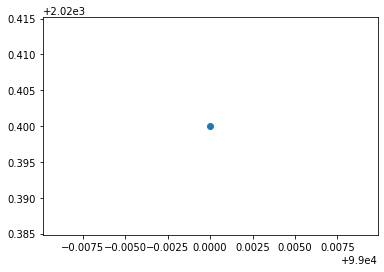

In [5]:
plt.scatter(E,A)

In [6]:
def processdat(x, y, n):
    yerr = []
    ya = []
    xa = []
    xerr = []
    
    #Error and average for 2 cm
    if (n == 1):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append((x[i]+1)*2*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.5**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*2*np.sqrt((.5/x[i])**2+(.1/2)**2)*760.1)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
    
    #Error and average for 1 mm
    if (n == 2):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append((x[i]+1)*.1*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.1*np.sqrt((.5/x[i])**2+(.01/.1)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
    
    #Error and average for 1 cm
    if (n == 3):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append((x[i]+1)*1*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.25**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*1*np.sqrt((.5/x[i])**2+(.01/1)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
    
    #Error and average for 5 mm
    if (n == 4):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append((x[i]+1)*.5*760)
            yerr.append(np.sqrt(((np.std(y[i], axis=0)))**2+.1**2+(ya[i]*.11565)**2))
            xerr.append(x[i]*.5*np.sqrt((.5/x[i])**2+(.01/.5)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    #Error and average for 1 mm, Absolute
    if (n == 5):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append(x[i]*.1*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.1*np.sqrt((.01/x[i])**2+(.001/.1)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    #Error and average for .1 mm, gauge
    if (n == 6):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append((x[i]+1)*.01*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.01*np.sqrt((.5/x[i])**2+(.005/.01)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    #Error and average for .1 mm, Absolute
    if (n == 7):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append(x[i]*.01*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.02**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.01*np.sqrt((.01/x[i])**2+(.001/.01)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    return ya, yerr, xa, xerr, trend

In [7]:
def processdatE(x, y, n):
    yerr = []
    ya = []
    xa = []
    xerr = []
    
    #Error and average for 2 cm
    if (n == 1):
        for i in range(len(x)):
            ya.append(np.mean(y[i], axis=0))
            xa.append((x[i]+1)*2*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.5**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*2*np.sqrt((.5/x[i])**2+(.1/2)**2)*760.1)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
    
    #Error and average for 1 mm
    if (n == 2):
        for i in range(len(x)):
            ya.append(np.mean(y[i]/.1, axis=0))
            xa.append((x[i]+1)*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.1*np.sqrt((.5/x[i])**2+(.01/.1)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
    
    #Error and average for 1 cm
    if (n == 3):
        for i in range(len(x)):
            ya.append(np.mean(y[i]/1, axis=0))
            xa.append((x[i]+1)*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.25**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*1*np.sqrt((.5/x[i])**2+(.01/1)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
    
    #Error and average for 5 mm
    if (n == 4):
        for i in range(len(x)):
            ya.append(np.mean(y[i]/.5, axis=0))
            xa.append((x[i]+1)*760)
            yerr.append(np.sqrt(((np.std(y[i], axis=0)))**2+.1**2+(ya[i]*.11565)**2))
            xerr.append(x[i]*.5*np.sqrt((.5/x[i])**2+(.01/.5)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    #Error and average for 1 mm, Absolute
    if (n == 5):
        for i in range(len(x)):
            ya.append(np.mean(y[i]/.1, axis=0))
            xa.append(x[i]*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.1*np.sqrt((.01/x[i])**2+(.01/.1)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    #Error and average for .1 mm, Gauge
    if (n == 6):
        for i in range(len(x)):
            ya.append(np.mean(y[i]/.01, axis=0))
            xa.append((x[i]+1)*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.01*np.sqrt((.5/x[i])**2+(.01/.005)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    #Error and average for .1 mm, Absolute
    if (n == 7):
        for i in range(len(x)):
            ya.append(np.mean(y[i]/.01, axis=0))
            xa.append(x[i]*760)
            yerr.append(np.sqrt((np.std(y[i], axis=0)**2+.1**2+(ya[i]*.11565)**2)))
            xerr.append(x[i]*.01*np.sqrt((.01/x[i])**2+(.01/.005)**2)*760)
        coeffs = np.polyfit(x, ya, 1)
        trend = np.poly1d(coeffs)
        ya=np.array(ya)*1000
        yerr=np.array(yerr)*1000
        
    return ya, yerr, xa, xerr

In [9]:

# 2 cm spacing - Argon CO2
x1=np.array([1,2])
y1=np.array([[34,33,33],[48,47,47]])
y1a, yerr1, x1a, xerr1, trend1 = processdat(x1,y1,1)

# 2 cm spacing - Argon CH4
x2=np.array([1,2])
y2=np.array([[38,34,33],[46,46,46]])
y2a, yerr2, x2a, xerr2, trend2 = processdat(x2,y2,1)

# 2 cm spacing - Argon
x3=np.array([1,2,3,4,5,6,7,8,9,10])
y3=np.array([[24,23,25],[26,31,31],[34,34,34],[30,32,33,34,34,34],[30,33,32,40,39,39],[36,36,38,45,44,40],[38,39,40,40,42,40],[38,40,44,44,44,42],[40,46,45,32,38,34],[38,42,47,40,38,38]])
y3a, yerr3, x3a, xerr3, trend3 = processdat(x3,y3,1)

# 1 mm spacing - Argon CO2
x4=np.array([1,2,3,4,5,6,7,8,9,10])
y4=np.array([[4,4,4],[5,5,5],[5.4,5.4,5.3],[6.4,6.4,6.3],[7.3,7.5,7.2],[8.2,8.3,8.1],[9.1,9.1,9.1],[10,10,10],[10.9,10.9,10.9],[11.7,11.8,11.8]])
y4a, yerr4, x4a, xerr4, trend4 = processdat(x4,y4,2)

# # 1 mm spacing - Argon CH4 -1
# x5=np.array([1,2,3,4,5,6,7,8,9,10])
# y5=np.array([[5,4,3.8],[4.5,4.5,4.4],[5.6,5.5,5.4],[6.3,6.3,6.2],[6.5,6.8,6.3],[6.7,6.4,6.6],[6.9,6.9,7],[7.2,7.6,7.6],[7.5,8.1,8.4],[9,9.1,9]])
# y5a, yerr5, x5a, xerr5, trend5 = processdat(x5,y5,2)

# 1 mm spacing - Argon CH4 -2
x5=([1,2,3,4,5,6,7,8,9,10])
y5=([[4,3.5,3.5],[4.1,4.4,4.3],[4.9,4.8,5],[5.5,5.6,5.3],[6,5.9,6],[6.2,6.2,6.1],[6.9,6.8,7.1],[7.5,7.7,7.6],[7.8,8,8.3],[8.9,9.1,9]])
y5a, yerr5, x5a, xerr5, trend5 = processdat(x5,y5,2)

# 1 mm spacing - Argon 
x6=np.array([1,2,3,4,5,6,7,8,9,10])
y6=np.array([[1.9,1.9,1.9],[2.6,2.5,2.5],[3.1,3.1,3.1],[3.6,3.6,3.6],[4.2,4.1,4.1],[4.6,4.6,4.6],[5.1,5.1,5.1],[5.6,5.5,5.6],[6,6,6],[6.5,6.4,6.4]])
y6a, yerr6, x6a, xerr6, trend6 = processdat(x6,y6,2)
E6a, Eerr6, p6a, perr6 = processdatE(x6,y6,2)

# 1 cm spacing - Argon CO2
x7=np.array([1,2,3,4])
y7=np.array([[21.8,21.6,21.5],[29.5,29.4,29.3],[38,37.7,37.7],[45.6,45.6,45.3]])
y7a, yerr7, x7a, xerr7, trend7 = processdat(x7,y7,3)

# 1 cm spacing - Argon CH4
x8=np.array([1,2,3,4,5])
y8=np.array([[24,20,20],[27.5,27.5,26.5],[33.5,33.5,34],[40.5,40.5,41],[47,47,47.5]])
y8a, yerr8, x8a, xerr8, trend8 = processdat(x8,y8,3)

# 1 cm spacing - Argon 
x9=np.array([1,2,3,4,5,6,7,8,9,10])
y9=np.array([[11.5,11.3,11.3],[15.5,15.7,15.7],[19.5,19.6,19.6],[23.5,23.5,23.5],[26.8,26.7,26.8],[30.3,30.3,30.3],[33.6,33.6,33.6],[36.6,36.5,36.5],[39.1,39.1,39.1],[42,41.9,41.9]])
y9a, yerr9, x9a, xerr9, trend9 = processdat(x9,y9,3)
E9a, Eerr9, p9a, perr9 = processdatE(x9,y9,3)

# 5 mm spacing - Argon CO2
x10=np.array([1,2,3,4,5,6,7,8,9,10])
y10=np.array([[11.2,10.8,11.1],[15.5,15.1,15],[19.6,19.4,19.6],[23.8,24,23.8],[27.3,27.3,27.4],[31.1,31.1,31.1],[35.5,34.8,35.2],[38.8,38,38.5],[43.5,42.5,42.6],[46.6,46,46.8]])
y10a, yerr10, x10a, xerr10, trend10 = processdat(x10,y10,4)

# 5 mm spacing - Argon CH4
x11=([1,2,3,4,5,6,7,8,9,10])
y11=([[11.9,11,10.5],[14.8,14.7,15.1],[18.4,18.3,18.4],[22.2,22.2,22.2],[25.2,25.5,25.6],[28.8,28,29],[31,30,30],[31,31,31],[34,33.4,32.5],[34.5,35.6,35.5]])
y11a, yerr11, x11a, xerr11, trend11 = processdat(x11,y11,4)

# 5 mm spacing - Argon (1 to 10 bar)
x12=np.array([1,2,3,4,5,6,7,8,9,10])
y12=np.array([[8.2,8.2,8.3],[10.6,10.5,10.5],[13.1,13.1,12.8],[15.4,15.2,15],[17,16.8,16.8],[19,18.8,18.8],[20.2,20.4,20.2],[22.5,22.1,22.2],[23.8,23.8,23.8],[25.3,25.6,25.3]])
y12a, yerr12, x12a, xerr12, trend12 = processdat(x12,y12,4)
E12a, Eerr12, p12a, perr12 = processdatE(x12,y12,4)

# 5 mm spacing - Argon (10 to 1 bar)
x13=np.array([1,2,3,4,5,6,7,8,9,10])
y13=np.array([[6.9,6.9,6.9],[9.6,9.6,9.5],[12.1,12,12],[13.8,13.9,13.9],[16.4,16.1,16],[18.2,18.1,18],[20,20,19.8],[21.8,21.4,21.5],[23.6,23.5,23.5],[25.2,24.8,24.6]])
y13a, yerr13, x13a, xerr13, trend13 = processdat(x13,y13,4)
E13a, Eerr13, p13a, perr13 = processdatE(x13,y13,4)

# 1 mm spacing - Argon
x14=np.array([1,2,3,4,5,6,7,8,9,10])
# x14=np.array([2,3,4,5,6,7,8,9,10,11])
y14=np.array([[2.6,2.7,2.6],[3.5,3.4,3.5],[4,4,4],[4.6,4.6,4.5],[5,5,5.1],[5.5,5.5,5.5],[6,5.9,6],[6.4,6.4,6.4],[6.9,6.9,6.9],[7.3,7.2,7.3]])
y14a, yerr14, x14a, xerr14, trend14 = processdat(x14,y14,2)
E14a, Eerr14, p14a, perr14 = processdatE(x14,y14,2)

# 1 mm spacing Argon, Absolute Pressure
x15=np.array([0.12,0.2,0.3,0.4,0.5,0.6,0.71,0.84,0.9,1])
y15=np.array([[.4,.4,.3],[.5,.3,.5],[.6,.5,.6],[.8,.7,.7],[.8,.8,.9],[.9,.9,.9],[1,1,.9],[1.1,1.1,1.1],[1.1,1.1,1.1],[1.2,1.2,1.2]])
y15a, yerr15, x15a, xerr15, trend15 = processdat(x15,y15,5)
E15a, Eerr15, p15a, perr15 = processdatE(x15,y15,5)

# 1 mm spacing Argon, Gauge Pressure
x16=np.array([1,2,3,4,5,6,7,8,9,10])
y16=np.array([[1.9,1.9,1.9],[2.4,2.4,2.4],[3.2,3.0,3.0],[3.4,3.5,3.4],[3.8,3.3,3.8],[4.1,4.1,4.2],[4.4,4.4,4.4],[4.7,4.7,4.8],[5.1,5.1,5.2],[5.4,5.5,5.4]])
y16a, yerr16, x16a, xerr16, trend16 = processdat(x16,y16,2)
E16a, Eerr16, p16a, perr16 = processdatE(x16,y16,2)

# .1 mm spacing Argon, Gauge Pressure
x17=np.array([1,2,3,4,5,6,7,8,9,10])
y17=np.array([[0.5,0.6,0.6],[0.7,0.7,0.7],[0.7,0.7,0.7],[0.8,0.8,0.8],[0.9,0.9,0.9],[1,1,1],[1.1,1.2,1.1],[1.2,1.2,1.2],[1.3,1.3,1.3],[1.3,1.4,1.4]])
y17a, yerr17, x17a, xerr17, trend17 = processdat(x17,y17,6)
E17a, Eerr17, p17a, perr17 = processdatE(x17,y17,6)

# .1 mm spacing Argon, Absolute 
x18=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
y18=np.array([[.18,.22,.18,.18,.2,.2,.22,.22,.22],[.2,.2,.2,.2,.2,.2,.225,.23,.225],[.2,.21,.22,.23,.24,.2,.25,.25,.25],[.25,.25,.24,.25,.25,.26,.25,.25,.26],[.28,.28,.27,.32,.28,.25,.3,.3,.29],[.27,.3,.28,.3,.32,.3,.32,.32,.3],[.35,.35,.34,.35,.36,.36,.35,.35,.35],[.35,.33,.33,.33,.35,.34,.35,.37,.38],[.38,.38,.4,.38,.38,.39,.38,.39,.38],[.4,.4,.41,.38,.41,.4,.4,.41,.4]])
y18a, yerr18, x18a, xerr18, trend18 = processdat(x18,y18,7)
# E18a, Eerr18, p18a, perr18 = processdatE(x18,y18,7)

# 1 mm spacing CO2, Absolute
x19=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
y19=np.array([[1.3,1.3,1.3],[2.2,1.9,1.9],[2.2,2.4,2.4],[2.7,2.6,2.7],[3.2,3.1,3],[3.6,3.7,3.5],[3.9,4.9,3.9],[4.4,4.2,4.6],[5.2,4.6,4.4],[4.9,5.9,5.3]])
y19a, yerr19, x19a, xerr19, trend19 = processdat(x19,y19,5)

# 1 mm spacing CO2
x20=np.array([1,2,3,4,5,6,7,8,9,10])
y20=np.array([[8.5,7.6,7.5,7.5],[9.8,9.8,9.8],[12.3,12.3,12.5],[14.7,14.8,14.7],[16.9,16.3,16.9],[18.4,18.5,19.2],[20.8,21.1,21.5],[22.4,22.9,22.9],[24.9,25.1,25.1],[27.8,27.4,27.2]])
y20a, yerr20, x20a, xerr20, trend20 = processdat(x20,y20,2)

# 1 mm spacing Argon-CO2, Absolute
x21=np.array([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
y21=np.array([[.7,.7,.75],[.95,.99,.83,.917],[1.01,1.16,1.13],[1.25,1.3,1.3],[1.6,1.6,1.4],[2.0,1.9,1.8],[2.4,2.1,1.9],[2.0,2.0,2.3,2.2],[2.2,2.1,2.1,2.1],[2.5,2.3,2.5]])
y21a, yerr21, x21a, xerr21, trend21 = processdat(x21,y21,5)

# 1 cm spacing CO2
x22=np.array([1])
y22=np.array([[52.6,49.8,48.9,48.7]])
y22a, yerr22, x22a, xerr22, trend22 = processdat(x22,y22,3)

# 1 mm spacing Argon-CH4, Absolute
x23=np.array([.11,.2,.3,.4,.5,.6,.7,.81,.9,1])
y23=np.array([[.6,.6,.6],[.8,.9,.8,.8],[1.1,1.0,1.1],[1.3,1.3,1.3],[1.4,1.4,1.4],[1.7,1.7,1.7],[2.0,1.9,1.9],[2.0,1.9,2.1,2.1],[2.1,2.1,2.1],[2.2,2.1,2.1,2.1]])
y23a, yerr23, x23a, xerr23, trend23 = processdat(x23,y23,5)

# 1 mm spacing Argon-CH4
x24=np.array([1,2,3,4,5,6,7,8,9,10])
y24=np.array([[3.1,3.2,3.3],[4.2,4.2,4.2],[4.9,5.1,5.0],[5.3,5.3,5.3,5.2],[6.1,5.9,5.7,6.1],[6.2,6.4,6.4],[6.4,7.0,6.7,6.8],[6.8,7.4,7.3],[7.6,7.5,7.3,7.5],[8.0,8.4,8.1]])
y24a, yerr24, x24a, xerr24, trend24 = processdat(x24,y24,2)

# 1 cm spacing Argon-CH4
x25=np.array([1,2,3,4,5,6])
y25=np.array([[19.8,19.4,19.4],[25.6,25.6,25.6],[32.6,32.6,32.8],[38.2,38.8,39],[44.6,44.9,44.9,44.9],[51,45,46.7]])
y25a, yerr25, x25a, xerr25, trend25 = processdat(x25,y25,3)

x_tot=np.concatenate([x6a, x9a, x12a, x13a, x14a, x15a, x16a, x17a])
y_tot=np.concatenate([y6a, y9a, y12a, y13a, y14a, y15a, y16a, y17a])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RankWarning: Polyfit may be poorly conditioned


In [10]:
def func(x, a, b, c):
    return a*x**b+c

params, covs = curve_fit(func, x_tot, y_tot)
print(params)

[  46.11858274    0.75643906 -106.50245955]


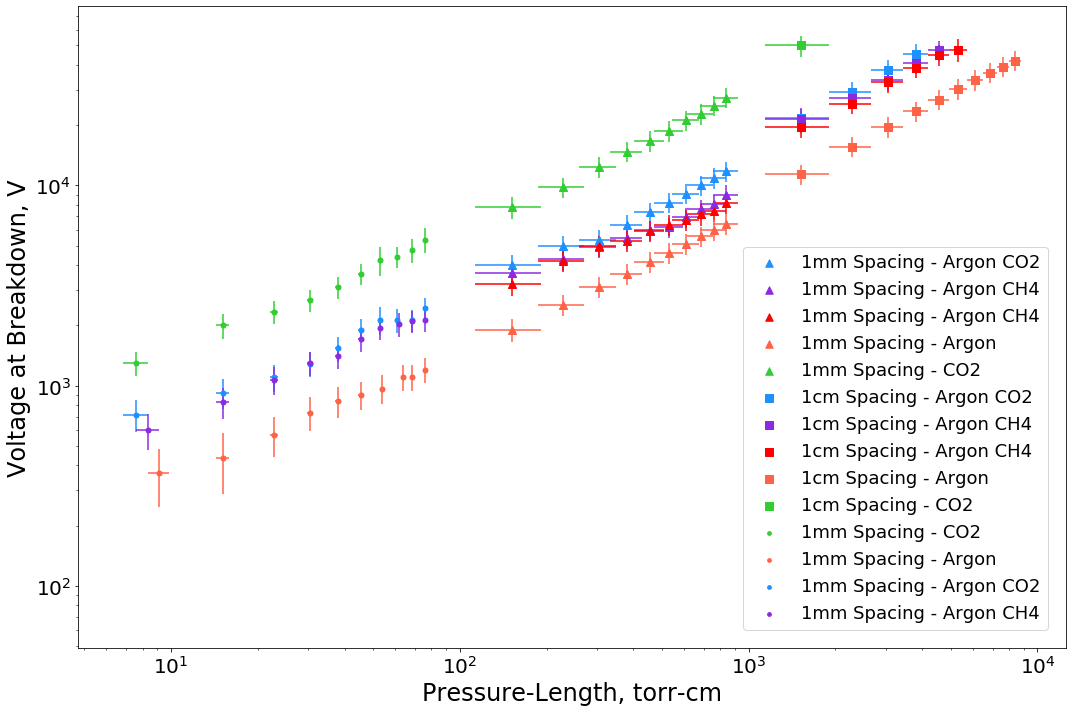

In [18]:
fig, ax = plt.subplots()
# plt.errorbar(x1a, y1a, xerr=xerr1, yerr=yerr1, ls='', color='dodgerblue', marker='o', ms=8)
# plt.scatter(x1a, y1a,color='dodgerblue', marker='o', s=56, label='2cm Spacing - Argon CO2')
# plt.errorbar(x2a, y2a, xerr=xerr2, yerr=yerr2, ls='', color='blueviolet', marker='o', ms=8)
# plt.scatter(x2a, y2a,color='blueviolet', marker='o', s=56, label='2cm Spacing - Argon CH4')
# plt.errorbar(x3a,y3a, xerr=xerr3, yerr=yerr3, ls='', color='tomato', marker='o', ms=8)
# plt.scatter(x3a,y3a,  color='tomato', marker='o', s=56, label='2cm Spacing - Argon')

plt.errorbar(x4a, y4a, xerr=xerr4, yerr=yerr4, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x4a, y4a,color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon CO2')
plt.errorbar(x5a, y5a, xerr=xerr5, yerr=yerr5, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(x5a, y5a,color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon CH4')
plt.errorbar(x24a, y24a, xerr=xerr24, yerr=yerr24, ls='', color='red', marker='^', ms=8)
plt.scatter(x24a, y24a,color='red', marker='^', s=56, label='1mm Spacing - Argon CH4')
plt.errorbar(x6a, y6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(x6a, y6a,color='tomato', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(x20a, y20a, xerr=xerr20, yerr=yerr20, ls='', color='limegreen', marker='^', ms=8)
plt.scatter(x20a, y20a,color='limegreen', marker='^', s=56, label='1mm Spacing - CO2')

plt.errorbar(x7a, y7a, xerr=xerr7, yerr=yerr7, ls='', color='dodgerblue', marker='s', ms=8)
plt.scatter(x7a, y7a,color='dodgerblue', marker='s', s=56, label='1cm Spacing - Argon CO2')
plt.errorbar(x8a, y8a, xerr=xerr8, yerr=yerr8, ls='', color='blueviolet', marker='s', ms=8)
plt.scatter(x8a, y8a,color='blueviolet', marker='s', s=56, label='1cm Spacing - Argon CH4')
plt.errorbar(x25a, y25a, xerr=xerr25, yerr=yerr25, ls='', color='red', marker='s', ms=8)
plt.scatter(x25a, y25a,color='red', marker='s', s=56, label='1cm Spacing - Argon CH4')
plt.errorbar(x9a, y9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(x9a, y9a,color='tomato', marker='s', s=56, label='1cm Spacing - Argon')
plt.errorbar(x22a, y22a, xerr=xerr22, yerr=yerr22, ls='', color='limegreen', marker='s', ms=8)
plt.scatter(x22a, y22a,color='limegreen', marker='s', s=56, label='1cm Spacing - CO2')

# plt.errorbar(x10a, y10a, xerr=xerr10, yerr=yerr10, ls='', color='dodgerblue', marker='X', ms=10)
# plt.scatter(x10a, y10a,color='dodgerblue', marker='X', s=56, label='5mm Spacing - Argon CO2')
# plt.errorbar(x11a, y11a, xerr=0.25, yerr=yerr11, ls='', color='blueviolet', marker='X', ms=10)
# plt.scatter(x11a, y11a,color='blueviolet', marker='X', s=56, label='5 mm Spacing - Argon CH4')
# plt.errorbar(x12a, y12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=10)
# plt.scatter(x12a, y12a,color='tomato', marker='X', s=56, label='5mm Spacing - Argon')

plt.errorbar(x19a, y19a, xerr=xerr19, yerr=yerr19, ls='', color='limegreen', marker='.', ms=10)
plt.scatter(x19a, y19a,color='limegreen', marker='.', s=56, label='1mm Spacing - CO2')
plt.errorbar(x15a,y15a, xerr=xerr15, yerr=yerr15, ls='', color='tomato', marker='.', ms=10)
plt.scatter(x15a,y15a,  color='tomato', marker='.', s=56, label='1mm Spacing - Argon')
plt.errorbar(x21a, y21a, xerr=xerr21, yerr=yerr21, ls='', color='dodgerblue', marker='.', ms=10)
plt.scatter(x21a, y21a,color='dodgerblue', marker='.', s=56, label='1mm Spacing - Argon CO2')
plt.errorbar(x23a, y23a, xerr=xerr23, yerr=yerr23, ls='', color='blueviolet', marker='.', ms=10)
plt.scatter(x23a, y23a,color='blueviolet', marker='.', s=56, label='1mm Spacing - Argon CH4')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

# ax.set_xlim([1e-2,30])

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()

plt.tight_layout()
plt.savefig('logplot.png', dpi=400)

# plt.scatter(p*d, Vb)

plt.show()


In [11]:


pfs = 8.8542*10**-12*100
e = 1.602*10**-19

M = 39.948
R = 8.314
T = 280

# n = mmAr2*p/R*T

gammase = .01

print(gammase)

R = 5.1/2
s = .1
l = s+R*2
r=l/(R*2)
S=r-1
print(S)
f = 1/(4*S)*(1+2*S+np.sqrt((1+2*S)**2+8))/(2*R) #enhancement factor
print(f)

f2 = .9*(R+s/2)/R #second enhancement factor
print(f2)

0.01
0.019607843137254832
10.13128604333266
0.9176470588235294


In [12]:
p = np.arange(.4, 1e4, .01)
d = 1
# Aco = 12
# Bco = 203
Aco = 12
Bco = 180
Cco = 946.205
xi = 1-.1503e2/.3155e3
k=.86
# k=.78

Vb = 1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase))) #OG Paschen Curve

Vb2 = 1/f*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase)))

# Vb2 = 1*p**k*Bco/(np.log(1*p*Aco/np.log(1+1/gammase)-p*Aco/Cco))

# Vb3 = 1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase)))-M*p*1/(2*62.36*1000*T*pfs)

# Vb3 = 1*(p/1.3)**k*Bco/(np.log(1*Aco*p/np.log(1+1/gammase)))

# Vb3 = 1/((8*10**(-5)*p)/100+1)*1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase)))

Vb4 = 1*p*Bco/(np.log(Aco*p*1/np.log(10^8))) #Meek Paschen Curve

# Vb2 = []

# for x in range(1, 10, 1):
#      Vb2.append((1/x)*p**k*Bco/(np.log(Aco*p*(1/x)/np.log(1+1/gammase))))

# Vb2 = 95/np.sqrt(2)*(p*1)**(2/3)#+1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase)))*(.5/p)

Vb2f = 46*p**.75

# Vb2 = 1*p*Bco/(np.log(Aco*p*1/np.log(1+1/gammase)))-46*p**.75

# print(xi)

In [13]:
# print(Vb.real)

In [14]:
pd_10mil = np.array([75.819,  66.675,  56.9595, 47.625,  37.9095, 27.813,  19.05,   17.3355, 15.24,
 13.335,  11.43,    9.525,   7.62,    5.5245,  3.2385])
v_10mil = np.array([1033.33333333,  951.66666667,  856.66666667,  780.,          691.66666667,
  570.,          450.,          426.33333333,  397.33333333,  371.66666667,
  344.33333333,  316.33333333,  285.66666667,  257.33333333,  221.66666667])
pd10mil_err = np.array([7.58429284, 6.67022087, 5.69913473, 4.76630848, 3.79573341, 2.78781634,
 1.91450131, 1.74398562, 1.5358601,  1.34703842, 1.15876626, 0.97136322,
 0.78545162, 0.58437253, 0.37572473])
v10mil_err = np.array([47.14045208, 18.40893503,  4.71404521,  4.0824829,   6.23609564,  4.0824829,
  0.,          2.62466929,  1.88561808,  2.3570226,   0.47140452,  1.24721913,
  3.09120617,  1.88561808,  1.24721913])

lep = np.arange(1, 10.5, .5)
ledat = np.array([[3.5,3.3,3.3,3.3],[4,3.8,3.8,3.9],[4.5,4.4,4.4,4.4],[4.8,5,4.9,5],[5.5,5.5,5.6,5.5],[6,6.1,6.1,6.1],[6.6,6.6,6.6,6.6],[7,7.1,7,7],[7.5,7.5,7.5,7.4],[8,8,7.9,7.9],[8.4,8.3,8.3,8.3],[8.6,8.7,8.6,8.7],[9,9,9.1,9],[9.4,9.3,9.4,9.3],[9.6,9.6,9.6,9.6],[9.9,9.9,10,9.9],[10.2,10.3,10.2,10.3],[10.5,10.5,10.5,10.5],[10.9,10.8,10.9,10.8]])
ledatm = []

for i in range(len(ledat)):
    ledatm.append(np.mean(ledat[i], axis = 0)*1000)

leerr = np.array([.0353,.0359,.024,.027,.0345,.04,.0442,.03553,.0519,.0456,.0536,.0552,.046,.0365,.0467,.0553,.0525,.0648,.0476])

print(leerr)
print(len(ledatm))
print(len(lep))

[0.0353  0.0359  0.024   0.027   0.0345  0.04    0.0442  0.03553 0.0519
 0.0456  0.0536  0.0552  0.046   0.0365  0.0467  0.0553  0.0525  0.0648
 0.0476 ]
19
19


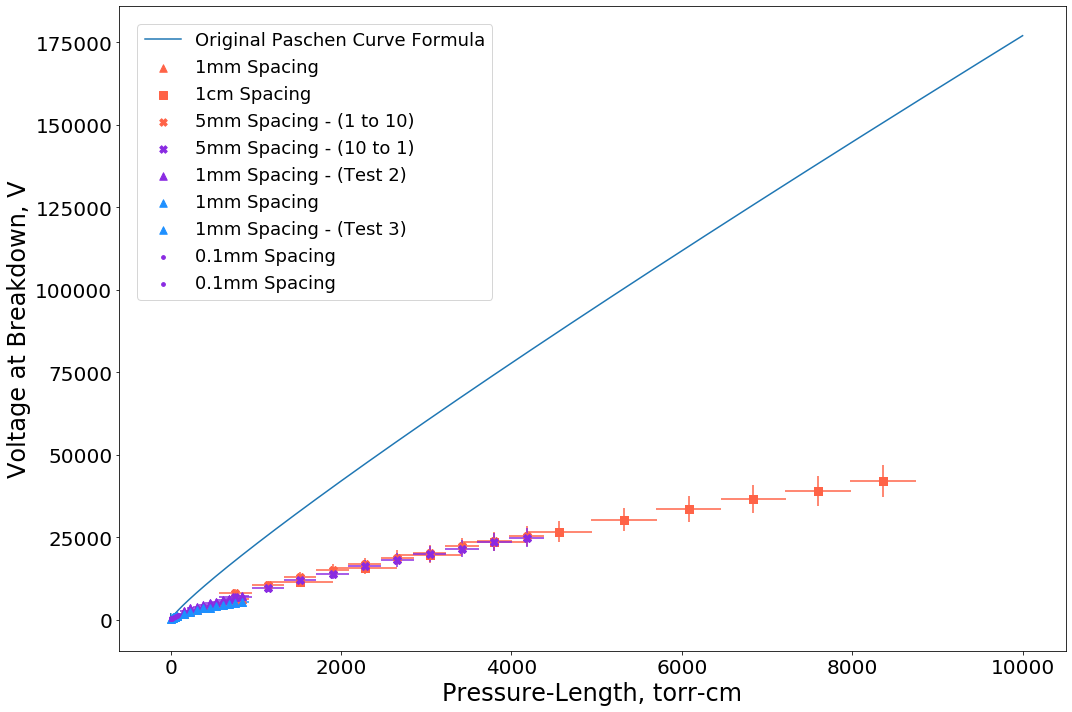

In [15]:
fig, ax = plt.subplots()
plt.errorbar(x6a, y6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(x6a, y6a,color='tomato', marker='^', s=56, label='1mm Spacing ')
plt.errorbar(x9a, y9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(x9a, y9a,color='tomato', marker='s', s=56, label='1cm Spacing')
plt.errorbar(x12a, y12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=8)
plt.scatter(x12a, y12a,color='tomato', marker='X', s=56, label='5mm Spacing - (1 to 10)')
plt.errorbar(x13a,y13a, xerr=xerr13, yerr=yerr13, ls='', color='blueviolet', marker='X', ms=8)
plt.scatter(x13a,y13a,  color='blueviolet', marker='X', s=56, label='5mm Spacing - (10 to 1)')
plt.errorbar(x14a,y14a, xerr=xerr14, yerr=yerr14, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(x14a,y14a,  color='blueviolet', marker='^', s=56, label='1mm Spacing - (Test 2)')
plt.errorbar(x15a,y15a, xerr=xerr15, yerr=yerr15, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x15a,y15a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing')
plt.errorbar(x16a,y16a, xerr=xerr16, yerr=yerr16, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(x16a,y16a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - (Test 3)')
plt.errorbar(x17a,y17a, xerr=xerr17, yerr=yerr17, ls='', color='blueviolet', marker='.', ms=8)
plt.scatter(x17a,y17a,  color='blueviolet', marker='.', s=56, label='0.1mm Spacing')
plt.errorbar(x18a,y18a, xerr=xerr18, yerr=yerr18, ls='', color='blueviolet', marker='.', ms=8)
plt.scatter(x18a,y18a,  color='blueviolet', marker='.', s=56, label='0.1mm Spacing')

# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

# ax.set_yscale('log')
# ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot(p, Vb, label='Original Paschen Curve Formula')

# for x in range(0, 9, 1):
#     plt.scatter(p*(1/(x+1)), Vb2[x], s=5)

# plt.plot(p, Vb4, label='Meek Criterion Formula')

# plt.plot(p, Vb2, label='Modified Formula')

# plt.plot(p, Vb2f, label='Fitted Curve')



plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# ax.set_ylim([30,1e6])
# ax.set_xlim([1e-1,1e4])
# pltplt.ylim(.grid())
plt.tight_layout()

plt.savefig('Arlogplot5.png',dpi=400)

plt.show()

NameError: name 'Vb3' is not defined

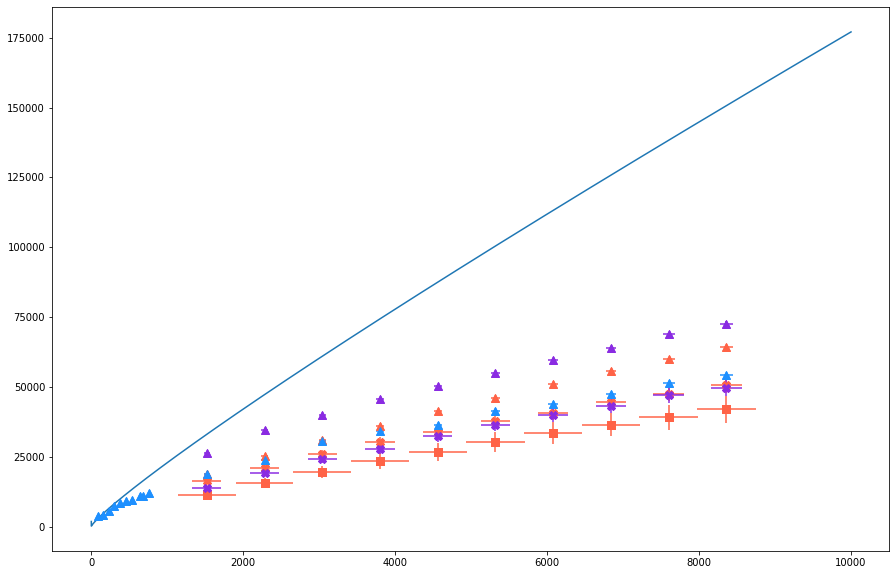

In [16]:
fig, ax = plt.subplots()
plt.errorbar(p6a, E6a, xerr=xerr6, yerr=yerr6, ls='', color='tomato', marker='^', ms=8)
plt.scatter(p6a, E6a,color='tomato', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(p9a, E9a, xerr=xerr9, yerr=yerr9, ls='', color='tomato', marker='s', ms=8)
plt.scatter(p9a, E9a,color='tomato', marker='s', s=56, label='1cm Spacing - Argon')
plt.errorbar(p12a, E12a, xerr=xerr12, yerr=yerr12, ls='', color='tomato', marker='X', ms=8)
plt.scatter(p12a, E12a,color='tomato', marker='X', s=56, label='5mm Spacing - Argon (1 to 10)')
plt.errorbar(p13a,E13a, xerr=xerr13, yerr=yerr13, ls='', color='blueviolet', marker='X', ms=8)
plt.scatter(p13a,E13a,  color='blueviolet', marker='X', s=56, label='5mm Spacing - Argon (10 to 1)')
plt.errorbar(p14a,E14a, xerr=xerr14, yerr=yerr14, ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(p14a,E14a,  color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon (Test 2)')
plt.errorbar(p15a,E15a, xerr=xerr15, yerr=yerr15, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(p15a,E15a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon')
plt.errorbar(p16a,E16a, xerr=xerr16, yerr=yerr16, ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(p16a,E16a,  color='dodgerblue', marker='^', s=56, label='1mm Spacing - Argon (Test 3)')


# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

# ax.set_yscale('log')
# ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.plot(p, Vb, label='Original Paschen Curve Formula')

# for x in range(0, 9, 1):
#     plt.scatter(p*(1/(x+1)), Vb2[x], s=5)

plt.plot(p, Vb3, label='Modified Formula')

# plt.plot(p, Vb4, label='Meek Criterion Formula')
# 
# plt.savefig('Arlogplot4.png',dpi=400)

plt.xlabel('Pressure, torr', fontsize=18)
plt.ylabel('Electric Field at Breakdown, V/cm', fontsize=18)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.set_ylim([10,1e5])
# ax.set_xlim([1e-1,5e4])
# pltplt.ylim(.grid())
plt.tight_layout()

plt.show()